In [ ]:
pip install xgboost==2.1.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 4.4 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.3
    Uninstalling xgboost-2.1.3:
      Successfully uninstalled xgboost-2.1.3


In [ ]:
pip install scikit-learn==1.5.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 20.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from geopy.distance import geodesic

# Load data
spbu_data = pd.read_csv("spbu.csv")  # Data SPBU
fasilitas_data = pd.read_csv("fasilitas.csv")  # Data fasilitas umum

# Menampilkan beberapa baris pertama dari masing-masing dataset
print("Dataset SPBU:")
print(spbu_data.head())  # Menampilkan 5 baris pertama dari dataset SPBU

print("\nDataset Fasilitas Umum:")
print(fasilitas_data.head())  # Menampilkan 5 baris pertama dari dataset fasilitas umum

Dataset SPBU:
      osm_id  code fclass       name  longitude  latitude  facility_count  \
0  330063880  5250   fuel       SPBU     99.161     3.322              33   
1  456045476  5250   fuel       SPBU    101.471     0.500              36   
2  457837210  5250   fuel  Pertamina    101.428     0.613               0   
3  457837211  5250   fuel  Pertamina    101.438     0.687               0   
4  457837500  5250   fuel  Pertamina    101.403     0.538               1   

       status  
0   strategis  
1   strategis  
2  tidak stra  
3  tidak stra  
4  tidak stra  

Dataset Fasilitas Umum:
      osm_id  code      fclass                        name  latitude  \
0  267556057  2404  guesthouse       Friendship Guesthouse     3.679   
1  268842942  2301  restaurant                      Mama's     5.876   
2  268842942  2404  guesthouse                      Mama's     5.876   
3  330062706  2301  restaurant  RM Simpang Raya, T. Tinggi     3.328   
4  330062729  2301  restaurant   Restoran 

In [ ]:
# Distribusi dari kolom 'status' pada dataset SPBU
print("Missing Value:")
print(spbu_data.isnull().sum())  # Menampilkan jumlah nilai kosong di setiap kolom



Missing Value:
osm_id              0
code                0
fclass              0
name              104
longitude           0
latitude            0
facility_count      0
status              0
dtype: int64


In [ ]:
spbu_data_cleaned = spbu_data.dropna()


In [ ]:
print(spbu_data_cleaned.isnull().sum())


osm_id            0
code              0
fclass            0
name              0
longitude         0
latitude          0
facility_count    0
status            0
dtype: int64


In [ ]:
spbu_data_cleaned.to_csv("cleaning.csv", index=False)

In [ ]:
if 'status' in spbu_data.columns:
    print("\nDistribusi Kolom 'status':")
    print(spbu_data['status'].value_counts())  # Jumlah SPBU strategis dan tidak strategis
else:
    print("\nKolom 'status' tidak ditemukan di dataset SPBU.")



Distribusi Kolom 'status':
status
strategis     243
tidak stra    188
Name: count, dtype: int64


In [ ]:
spbu_data

,osm_id,code,fclass,name,longitude,latitude,facility_count,status
0,330063880,5250,fuel,SPBU,99.161,3.322,33,strategis
1,456045476,5250,fuel,SPBU,101.471,0.500,36,strategis
2,457837210,5250,fuel,Pertamina,101.428,0.613,0,tidak stra
3,457837211,5250,fuel,Pertamina,101.438,0.687,0,tidak stra
4,457837500,5250,fuel,Pertamina,101.403,0.538,1,tidak stra
...,...,...,...,...,...,...,...,...
426,10704076934,5250,fuel,Pertamina,98.820,2.692,1,tidak stra
427,10720845195,5250,fuel,Pertamina,99.067,2.971,0,tidak stra
428,10991721289,5250,fuel,SPBU 14 202 102,98.694,3.559,61,strategis
429,10991751869,5250,fuel,SPBU 14.201.1126,98.687,3.568,50,strategis


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Pilih semua kolom numerik
numeric_columns = spbu_data_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Terapkan Min-Max Normalisasi ke semua kolom numerik
spbu_data_cleaned[numeric_columns] = scaler.fit_transform(spbu_data_cleaned[numeric_columns])

# Cek hasil normalisasi
print("Hasil Normalisasi pada Semua Kolom Numerik:")
print(spbu_data_cleaned.head())


Hasil Normalisasi pada Semua Kolom Numerik:
     osm_id  code fclass       name  longitude  latitude  facility_count  \
0  0.000000   0.0   fuel       SPBU   0.372941  0.780942        0.160194   
1  0.011692   0.0   fuel       SPBU   0.592878  0.541057        0.174757   
2  0.011859   0.0   fuel  Pertamina   0.588784  0.550663        0.000000   
3  0.011859   0.0   fuel  Pertamina   0.589736  0.556953        0.000000   
4  0.011859   0.0   fuel  Pertamina   0.586404  0.544288        0.004854   

       status  
0   strategis  
1   strategis  
2  tidak stra  
3  tidak stra  
4  tidak stra  


<ipython-input-30-c7c05d0289ac>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spbu_data_cleaned[numeric_columns] = scaler.fit_transform(spbu_data_cleaned[numeric_columns])


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Terapkan encoding pada kolom 'status'
spbu_data_cleaned['status_encoded'] = label_encoder.fit_transform(spbu_data_cleaned['status'])

# Hapus kolom asli 'status' jika tidak dibutuhkan lagi
spbu_data_cleaned.drop('status', axis=1, inplace=True)

# Menampilkan mapping label encoding
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Mapping Label Encoding:", label_mapping)

# Cek hasil encoding
print("Hasil Encoding:")
print(spbu_data_cleaned.head())


Mapping Label Encoding: {'strategis': 0, 'tidak stra': 1}
Hasil Encoding:
     osm_id  code fclass       name  longitude  latitude  facility_count  \
0  0.000000   0.0   fuel       SPBU   0.372941  0.780942        0.160194   
1  0.011692   0.0   fuel       SPBU   0.592878  0.541057        0.174757   
2  0.011859   0.0   fuel  Pertamina   0.588784  0.550663        0.000000   
3  0.011859   0.0   fuel  Pertamina   0.589736  0.556953        0.000000   
4  0.011859   0.0   fuel  Pertamina   0.586404  0.544288        0.004854   

   status_encoded  
0               0  
1               0  
2               1  
3               1  
4               1  


<ipython-input-31-9d94c6e817f1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spbu_data_cleaned['status_encoded'] = label_encoder.fit_transform(spbu_data_cleaned['status'])
<ipython-input-31-9d94c6e817f1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spbu_data_cleaned.drop('status', axis=1, inplace=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Terapkan encoding pada kolom 'status'
spbu_data_cleaned['name_encoded'] = label_encoder.fit_transform(spbu_data_cleaned['name'])

# Hapus kolom asli 'status' jika tidak dibutuhkan lagi
spbu_data_cleaned.drop('name', axis=1, inplace=True)

# Menampilkan mapping label encoding
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Mapping Label Encoding:", label_mapping)

# Cek hasil encoding
print("Hasil Encoding:")
print(spbu_data_cleaned.head())


Mapping Label Encoding: {'Ale Pom Bensin': 0, 'Bensin': 1, 'Bensin Eceran Bewok': 2, 'Depot Elpiji': 3, 'Fuel Bensin Mekar Sari': 4, 'Fuel Bensin Tiban 3': 5, 'Fuel Station (Rumah Hitam) Sekupang': 6, 'Fuel Station (Spbu Tembesi)': 7, 'Fuel Station(Spbu Kabil)': 8, 'Fuel Temiang': 9, 'Fuel Uib': 10, 'Kios Bensin': 11, 'Masjid Al Syadar': 12, 'Minyak Eceran': 13, 'PERTAMINA Al-Azhar': 14, 'PERTAMINA Aston': 15, 'PERTAMINA Belakang BCA Jodoh': 16, 'PERTAMINA Bengkong': 17, 'PERTAMINA Duriangkang': 18, 'PERTAMINA Duta Mas': 19, 'PERTAMINA Harbour Bay': 20, 'PERTAMINA KDA Batam Kota': 21, 'PERTAMINA Marchelia': 22, 'PERTAMINA PIH': 23, 'PERTAMINA REGATA': 24, 'PERTAMINA Seraya': 25, 'PERTAMINA Sukajadi': 26, 'PERTAMINA Sungai Panas': 27, 'PGN Gas Station': 28, 'Pertamina': 29, 'Pertamina Tebing Tinggi': 30, 'Pertamini': 31, 'Pertamini Abdl Malik': 32, 'Pertamini Dobdob': 33, 'Pertamini Eceran': 34, 'Pertamini Gusti': 35, 'Pertamini Iwan Astra': 36, 'Pertamini Mang Mul': 37, 'Pertamini Nola

<ipython-input-32-dacccccf0828>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spbu_data_cleaned['name_encoded'] = label_encoder.fit_transform(spbu_data_cleaned['name'])
<ipython-input-32-dacccccf0828>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spbu_data_cleaned.drop('name', axis=1, inplace=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Terapkan encoding pada kolom 'status'
spbu_data_cleaned['fclass_encoded'] = label_encoder.fit_transform(spbu_data_cleaned['fclass'])

# Hapus kolom asli 'status' jika tidak dibutuhkan lagi
spbu_data_cleaned.drop('fclass', axis=1, inplace=True)

# Menampilkan mapping label encoding
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Mapping Label Encoding:", label_mapping)

# Cek hasil encoding
print("Hasil Encoding:")
print(spbu_data_cleaned.head())


Mapping Label Encoding: {'fuel': 0}
Hasil Encoding:
     osm_id  code  longitude  latitude  facility_count  status_encoded  \
0  0.000000   0.0   0.372941  0.780942        0.160194               0   
1  0.011692   0.0   0.592878  0.541057        0.174757               0   
2  0.011859   0.0   0.588784  0.550663        0.000000               1   
3  0.011859   0.0   0.589736  0.556953        0.000000               1   
4  0.011859   0.0   0.586404  0.544288        0.004854               1   

   name_encoded  fclass_encoded  
0            56               0  
1            56               0  
2            29               0  
3            29               0  
4            29               0  


<ipython-input-33-da7280b24311>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spbu_data_cleaned['fclass_encoded'] = label_encoder.fit_transform(spbu_data_cleaned['fclass'])
<ipython-input-33-da7280b24311>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spbu_data_cleaned.drop('fclass', axis=1, inplace=True)


In [ ]:
spbu_data_cleaned.to_csv("cleaning2.csv", index=False)

In [ ]:
df = pd.read_csv('/content/cleaning2.csv')

In [ ]:
df

,osm_id,code,longitude,latitude,facility_count,status_encoded,name_encoded,fclass_encoded
0,0.000000,0.0,0.372941,0.780942,0.160194,0,56,0
1,0.011692,0.0,0.592878,0.541057,0.174757,0,56,0
2,0.011859,0.0,0.588784,0.550663,0.000000,1,29,0
3,0.011859,0.0,0.589736,0.556953,0.000000,1,29,0
4,0.011859,0.0,0.586404,0.544288,0.004854,1,29,0
...,...,...,...,...,...,...,...,...
322,0.962804,0.0,0.340474,0.727389,0.004854,1,29,0
323,0.964360,0.0,0.363991,0.751105,0.000000,1,29,0
324,0.989500,0.0,0.328478,0.801088,0.296117,0,58,0
325,0.989503,0.0,0.327811,0.801853,0.242718,0,59,0


In [ ]:
from math import gamma
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb
import numpy as np
import pandas as pd
from matplotlib.ticker import FormatStrFormatter

# Data Preparation
X = df.drop(columns=['status_encoded'])
y = df['status_encoded']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter untuk binary classification
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'learning_rate': 0.2,
    'max_depth': 8,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# Parameter grid untuk hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0.001, 0.0001, 0.01],
}

# Grid Search
print("Memulai Grid Search...")
grid_search = GridSearchCV(
    estimator=xgb.XGBClassifier(**params),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1
)

start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

# Waktu pelatihan Grid Search
training_duration = end_time - start_time
print(f'Waktu yang dibutuhkan untuk Grid Search: {training_duration:.2f} detik')

# Menampilkan hasil terbaik
print("\nHasil terbaik dari Grid Search:")
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation score (ROC AUC): {grid_search.best_score_:.4f}')

# Ambil model terbaik
best_model = grid_search.best_estimator_

# Konversi data ke DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Siapkan watchlist
watchlist = [(dtrain, 'train'), (dtest, 'eval')]

# Callback untuk evaluasi
class LossRecorder(xgb.callback.TrainingCallback):
    def __init__(self):
        self.train_losses = []
        self.val_losses = []
        self.train_accuracies = []
        self.val_accuracies = []
        self.iteration_counts = []

    def after_iteration(self, model, epoch, evals_log):
        if evals_log:
            train_metrics = evals_log.get('train', {}).get('logloss', [])
            eval_metrics = evals_log.get('eval', {}).get('logloss', [])

            if train_metrics and eval_metrics:
                self.train_losses.append(train_metrics[-1])
                self.val_losses.append(eval_metrics[-1])

                # Calculate accuracies
                train_preds = model.predict(dtrain) > 0.5
                val_preds = model.predict(dtest) > 0.5
                self.train_accuracies.append(accuracy_score(y_train, train_preds))
                self.val_accuracies.append(accuracy_score(y_test, val_preds))

                self.iteration_counts.append(epoch)
        return False

# Inisialisasi callback
loss_recorder = LossRecorder()

print("\nMemulai training model final dengan parameter terbaik...")
# Training dengan callback XGBoost
model = xgb.train(
    params=best_model.get_params(),
    dtrain=dtrain,
    num_boost_round=best_model.n_estimators,
    evals=watchlist,
    verbose_eval=10,
    early_stopping_rounds=50,
    callbacks=[loss_recorder]
)



Memulai Grid Search...
Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Waktu yang dibutuhkan untuk Grid Search: 122.07 detik

Hasil terbaik dari Grid Search:
Best parameters: {'colsample_bytree': 0.6, 'gamma': 0.001, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.6}
Best cross-validation score (ROC AUC): 1.0000

Memulai training model final dengan parameter terbaik...
[0]	train-logloss:0.62473	eval-logloss:0.68809
[10]	train-logloss:0.55977	eval-logloss:0.61710
[20]	train-logloss:0.53176	eval-logloss:0.59266
[30]	train-logloss:0.46652	eval-logloss:0.51902
[40]	train-logloss:0.41963	eval-logloss:0.46679
[49]	train-logloss:0.39465	eval-logloss:0.44008


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:42:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "enable_categorical", "missing", "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)



Memulai visualisasi hasil training...


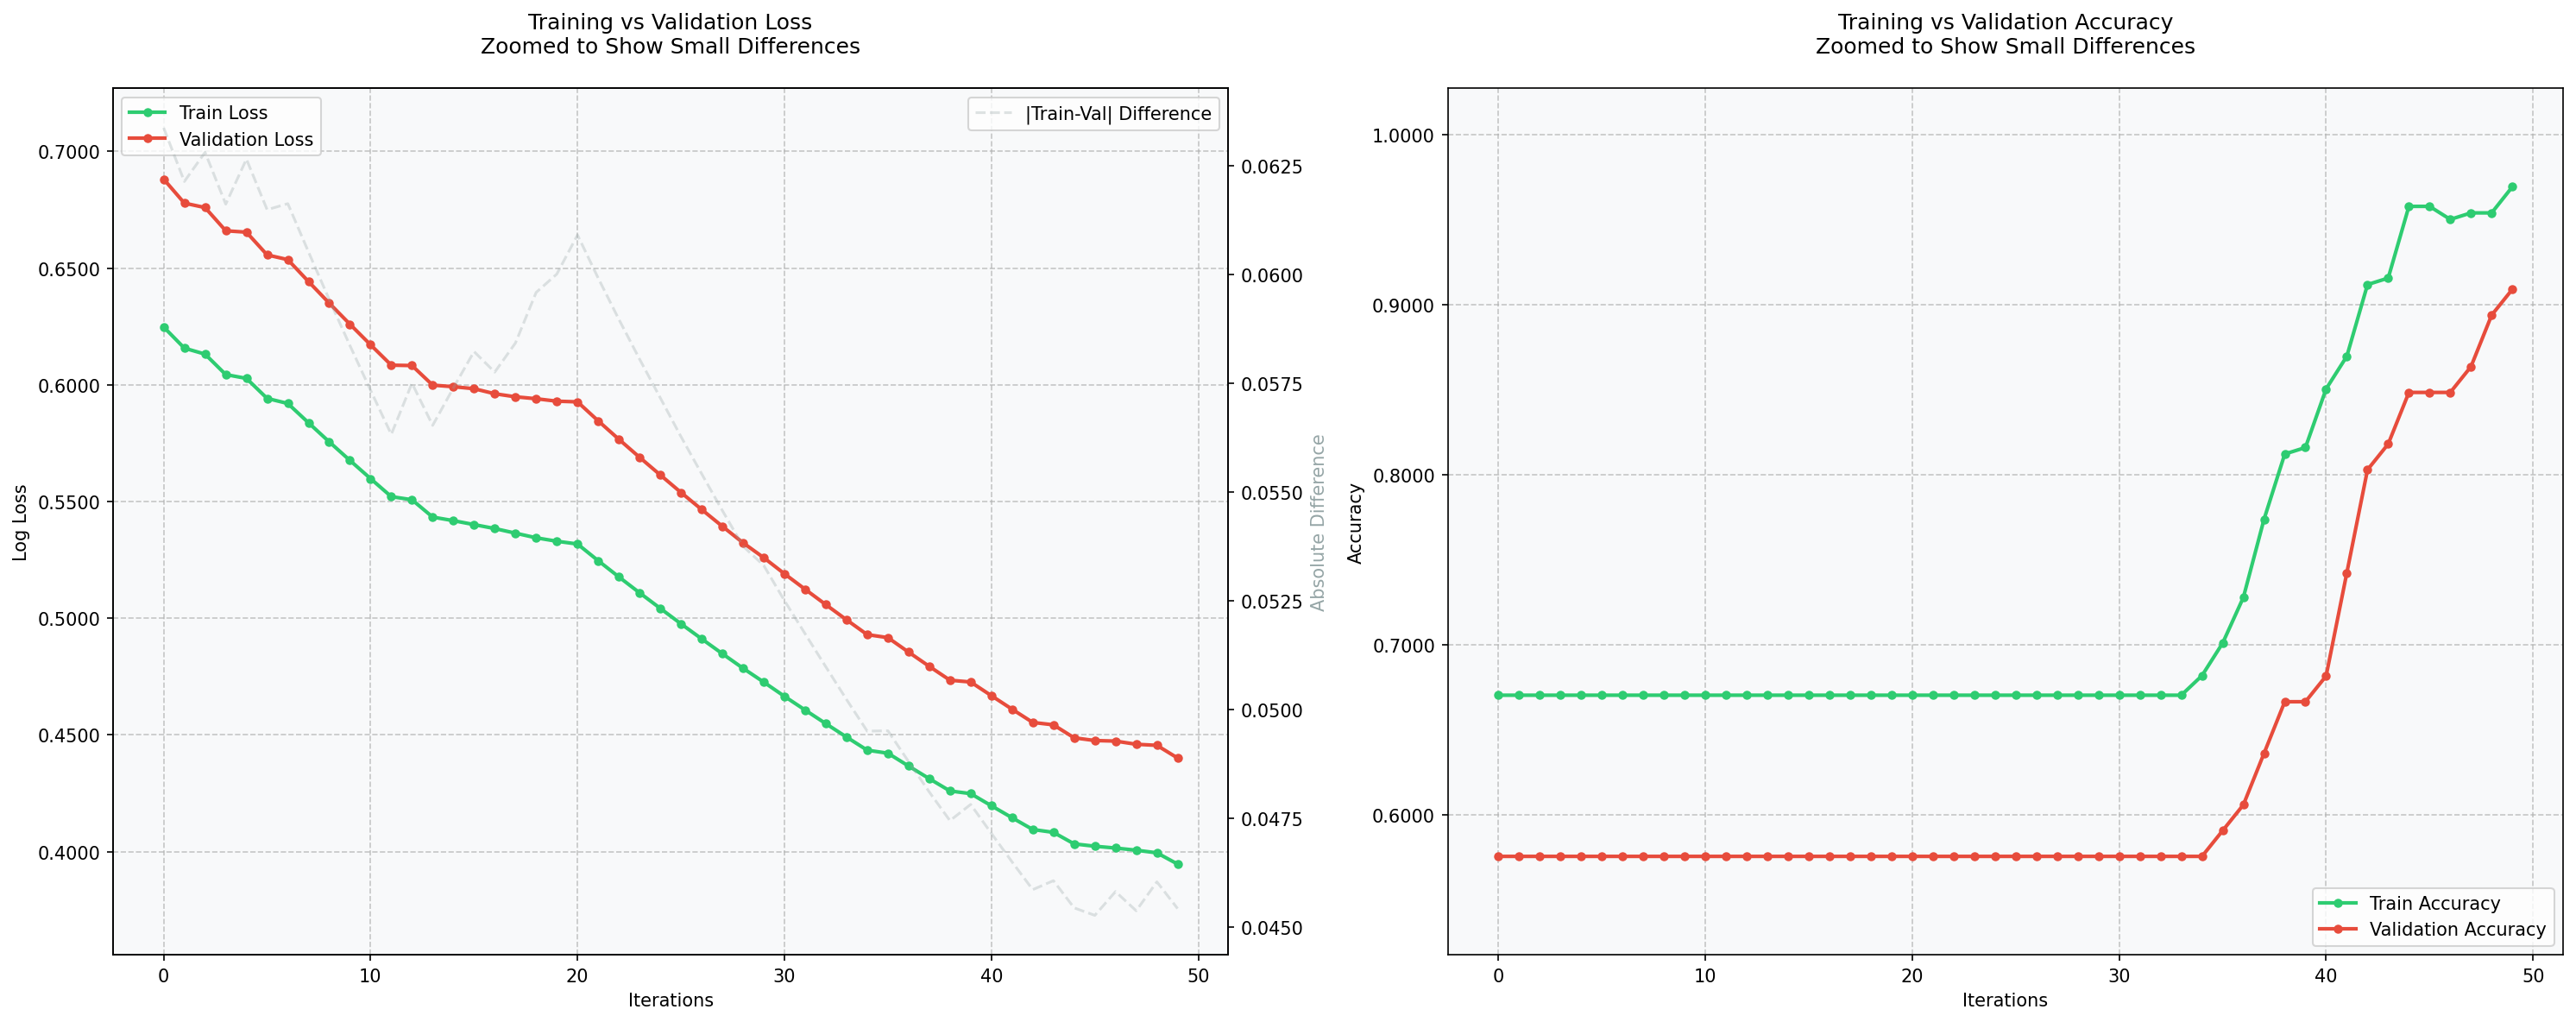

In [ ]:
# [Semua import dan kode sebelumnya tetap sama sampai bagian visualisasi]

print("\nMemulai visualisasi hasil training...")
# Set basic style
plt.style.use('default')  # Menggunakan default style matplotlib

# Atur warna yang menarik
colors = ['#2ecc71', '#e74c3c', '#95a5a6']

# Create figure with adjusted size and DPI
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), dpi=150, facecolor='white')

# Plot 1: Loss curves with enhanced visibility
train_losses = np.array(loss_recorder.train_losses)
val_losses = np.array(loss_recorder.val_losses)

# Calculate the mean and standard deviation for dynamic y-axis limits
mean_loss = np.mean([train_losses, val_losses])
std_loss = np.std([train_losses, val_losses])

# Set y-axis limits slightly above and below the actual values
y_min = min(np.min(train_losses), np.min(val_losses)) - std_loss * 0.5
y_max = max(np.max(train_losses), np.max(val_losses)) + std_loss * 0.5

# Plot training loss
ax1.plot(loss_recorder.iteration_counts, train_losses,
         label='Train Loss', linewidth=2, marker='o', markersize=4,
         color=colors[0])
ax1.plot(loss_recorder.iteration_counts, val_losses,
         label='Validation Loss', linewidth=2, marker='o', markersize=4,
         color=colors[1])

# Enhance loss plot
ax1.set_ylim(y_min, y_max)
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.set_title('Training vs Validation Loss\nZoomed to Show Small Differences',
              fontsize=12, pad=20)
ax1.set_xlabel('Iterations', fontsize=10)
ax1.set_ylabel('Log Loss', fontsize=10)
ax1.set_facecolor('#f8f9fa')

# Add loss difference plot
loss_diff = np.absolute(train_losses - val_losses)
ax1_twin = ax1.twinx()
ax1_twin.plot(loss_recorder.iteration_counts, loss_diff,
              label='|Train-Val| Difference',
              color=colors[2], alpha=0.3, linestyle='--')
ax1_twin.set_ylabel('Absolute Difference', color=colors[2])

# Plot 2: Accuracy curves
train_accuracies = np.array(loss_recorder.train_accuracies)
val_accuracies = np.array(loss_recorder.val_accuracies)

ax2.plot(loss_recorder.iteration_counts, train_accuracies,
         label='Train Accuracy', linewidth=2, marker='o', markersize=4,
         color=colors[0])
ax2.plot(loss_recorder.iteration_counts, val_accuracies,
         label='Validation Accuracy', linewidth=2, marker='o', markersize=4,
         color=colors[1])

# Enhance accuracy plot
mean_acc = np.mean([train_accuracies, val_accuracies])
std_acc = np.std([train_accuracies, val_accuracies])
acc_y_min = min(np.min(train_accuracies), np.min(val_accuracies)) - std_acc * 0.5
acc_y_max = max(np.max(train_accuracies), np.max(val_accuracies)) + std_acc * 0.5
ax2.set_ylim(acc_y_min, acc_y_max)
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.set_title('Training vs Validation Accuracy\nZoomed to Show Small Differences',
              fontsize=12, pad=20)
ax2.set_xlabel('Iterations', fontsize=10)
ax2.set_ylabel('Accuracy', fontsize=10)
ax2.set_facecolor('#f8f9fa')

# Add legends with better positioning
ax1.legend(loc='upper left', bbox_to_anchor=(0, 1), frameon=True)
ax1_twin.legend(loc='upper right', bbox_to_anchor=(1, 1), frameon=True)
ax2.legend(loc='lower right', bbox_to_anchor=(1, 0), frameon=True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# [Semua kode print metrics tetap sama seperti sebelumnya]

In [ ]:
# Print final metrics
print("\nMetrik Final:")
print(f"Final Train Loss: {train_losses[-1]:.6f}")
print(f"Final Validation Loss: {val_losses[-1]:.6f}")
print(f"Final Train Accuracy: {train_accuracies[-1]:.6f}")
print(f"Final Validation Accuracy: {val_accuracies[-1]:.6f}")

# Print statistics about the differences
print("\nStatistik Perbedaan Loss:")
print(f"Maximum absolute difference between train and val loss: {np.max(loss_diff):.6f}")
print(f"Mean absolute difference between train and val loss: {np.mean(loss_diff):.6f}")
print(f"Standard deviation of differences: {np.std(loss_diff):.6f}")


Metrik Final:
Final Train Loss: 0.394646
Final Validation Loss: 0.440080
Final Train Accuracy: 0.969349
Final Validation Accuracy: 0.909091

Statistik Perbedaan Loss:
Maximum absolute difference between train and val loss: 0.063361
Mean absolute difference between train and val loss: 0.054340
Standard deviation of differences: 0.005902



=== Metrik Evaluasi Model (Training Set) ===
Accuracy: 0.9693
Precision: 1.0000
Recall: 0.9070
F1 Score: 0.9512

=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       175
           1       1.00      0.91      0.95        86

    accuracy                           0.97       261
   macro avg       0.98      0.95      0.96       261
weighted avg       0.97      0.97      0.97       261



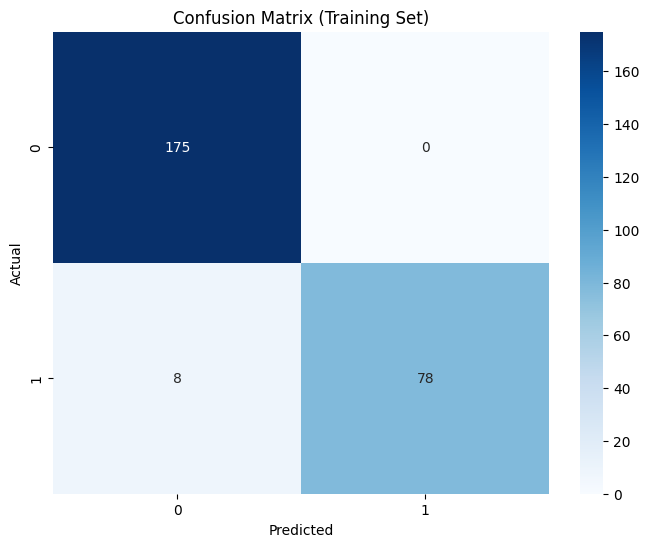

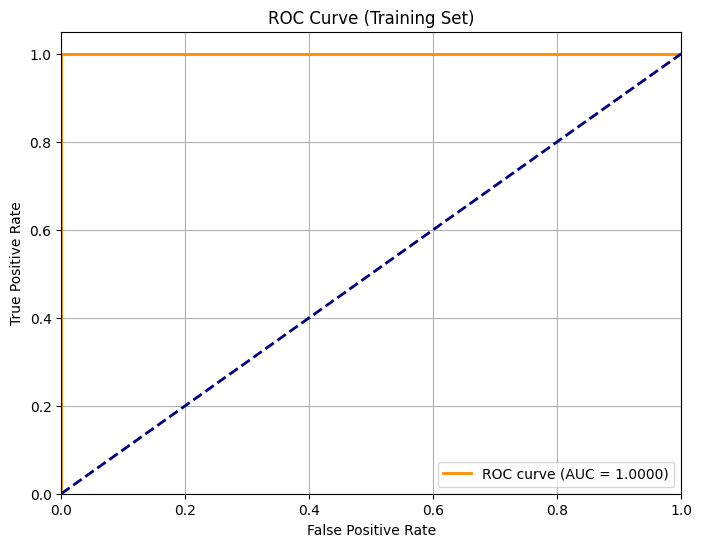


=== Detailed Confusion Matrix Analysis (Training Set) ===
True Negatives: 175
False Positives: 0
False Negatives: 8
True Positives: 78

=== Additional Metrics (Training Set) ===
Specificity (True Negative Rate): 1.0000
Negative Predictive Value: 0.9563
False Positive Rate: 0.0000
False Negative Rate: 0.0930

=== Metrik Evaluasi Model (Test Set) ===
Accuracy: 0.9091
Precision: 1.0000
Recall: 0.7857
F1 Score: 0.8800

=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        38
           1       1.00      0.79      0.88        28

    accuracy                           0.91        66
   macro avg       0.93      0.89      0.90        66
weighted avg       0.92      0.91      0.91        66



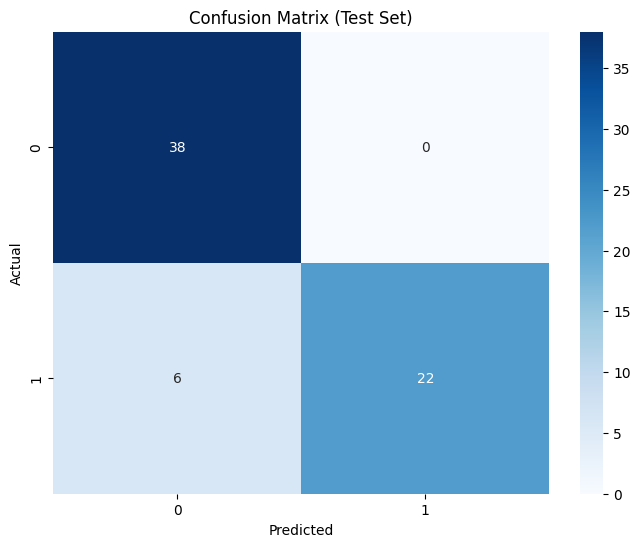

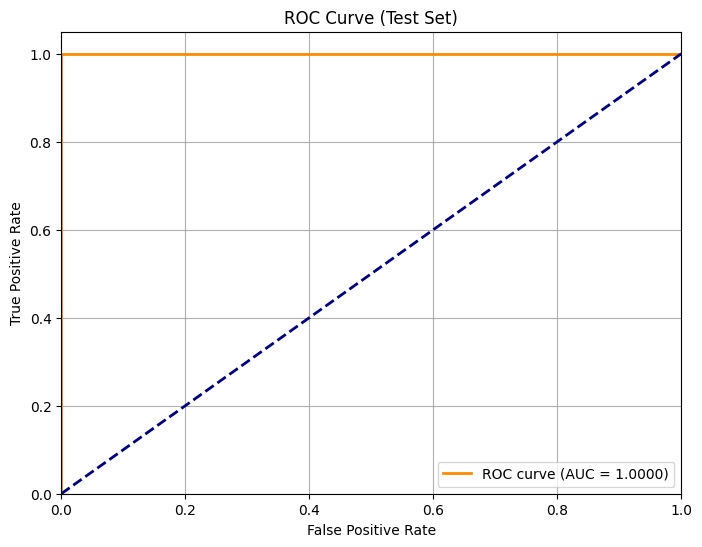


=== Detailed Confusion Matrix Analysis (Test Set) ===
True Negatives: 38
False Positives: 0
False Negatives: 6
True Positives: 22

=== Additional Metrics (Test Set) ===
Specificity (True Negative Rate): 1.0000
Negative Predictive Value: 0.8636
False Positive Rate: 0.0000
False Negative Rate: 0.2143

=== Perbandingan Metrik Train vs Test ===
             Training  Testing
accuracy       0.9693   0.9091
precision      1.0000   1.0000
recall         0.9070   0.7857
f1             0.9512   0.8800
auc            1.0000   1.0000
specificity    1.0000   1.0000
npv            0.9563   0.8636
fpr            0.0000   0.0000
fnr            0.0930   0.2143


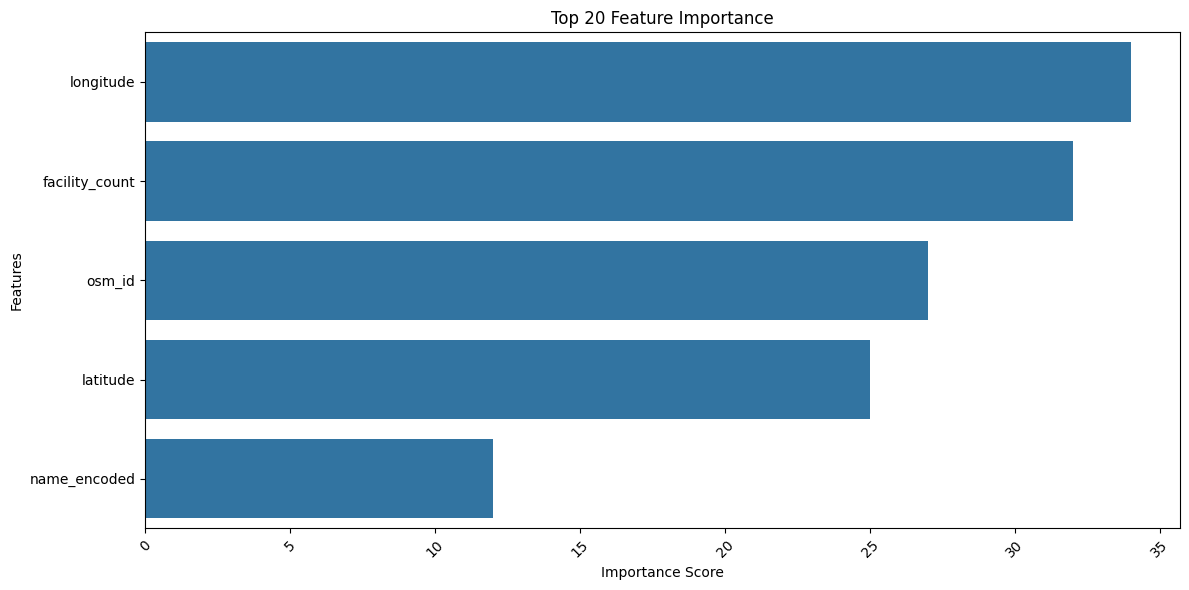

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc
)

def evaluate_and_print_metrics(y_true, y_pred, y_pred_proba, set_name=""):
    """
    Fungsi untuk menghitung dan menampilkan metrik evaluasi
    """
    # Hitung metrik dasar
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"\n=== Metrik Evaluasi Model ({set_name}) ===")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Classification Report
    print(f"\n=== Classification Report ({set_name}) ===")
    print(classification_report(y_true, y_pred))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix ({set_name})')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({set_name})')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    # Detail Confusion Matrix
    tn, fp, fn, tp = conf_matrix.ravel()
    print(f"\n=== Detailed Confusion Matrix Analysis ({set_name}) ===")
    print(f"True Negatives: {tn}")
    print(f"False Positives: {fp}")
    print(f"False Negatives: {fn}")
    print(f"True Positives: {tp}")

    # Additional Metrics
    specificity = tn / (tn + fp)
    npv = tn / (tn + fn)
    fpr = fp / (fp + tn)
    fnr = fn / (fn + tp)

    print(f"\n=== Additional Metrics ({set_name}) ===")
    print(f"Specificity (True Negative Rate): {specificity:.4f}")
    print(f"Negative Predictive Value: {npv:.4f}")
    print(f"False Positive Rate: {fpr:.4f}")
    print(f"False Negative Rate: {fnr:.4f}")

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'auc': roc_auc,
        'specificity': specificity,
        'npv': npv,
        'fpr': fpr,
        'fnr': fnr
    }

# Mendapatkan prediksi untuk data training
y_train_pred_proba = model.predict(dtrain)
y_train_pred = (y_train_pred_proba > 0.5).astype(int)

# Mendapatkan prediksi untuk data testing
y_test_pred_proba = model.predict(dtest)
y_test_pred = (y_test_pred_proba > 0.5).astype(int)

# Evaluasi untuk training set
train_metrics = evaluate_and_print_metrics(y_train, y_train_pred, y_train_pred_proba, "Training Set")

# Evaluasi untuk test set
test_metrics = evaluate_and_print_metrics(y_test, y_test_pred, y_test_pred_proba, "Test Set")

# Perbandingan metrik train vs test
comparison_df = pd.DataFrame({
    'Training': train_metrics,
    'Testing': test_metrics
}).round(4)

print("\n=== Perbandingan Metrik Train vs Test ===")
print(comparison_df)

# Plot Feature Importance
feature_importance = model.get_fscore()
features = []
importance = []

for feature, score in feature_importance.items():
    features.append(feature)
    importance.append(score)

importance_df = pd.DataFrame({
    'feature': features,
    'importance': importance
})

importance_df = importance_df.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=importance_df.head(20), x='importance', y='feature')
plt.title('Top 20 Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Inisialisasi model
model = RandomForestClassifier(random_state=42)

# Latih model dengan data pelatihan
model.fit(X_train, y_train)

# Prediksi pada data pengujian
y_pred = model.predict(X_test)

# Evaluasi model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

   strategis       0.75      0.83      0.79        70
  tidak stra       0.77      0.68      0.73        60

    accuracy                           0.76       130
   macro avg       0.76      0.76      0.76       130
weighted avg       0.76      0.76      0.76       130



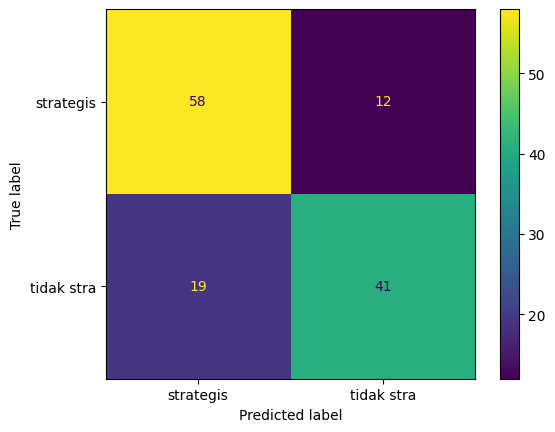

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()


In [ ]:
import pandas as pd

# Buat DataFrame baru untuk menyimpan data asli dan hasil prediksi
hasil_prediksi = X_test.copy()  # Salin data fitur dari X_test
hasil_prediksi['actual_status'] = y_test.values  # Tambahkan kolom status aktual
hasil_prediksi['predicted_status'] = y_pred  # Tambahkan kolom status prediksi

# Simpan ke dalam file CSV
hasil_prediksi.to_csv("hasil_prediksi_spbu.csv", index=False)

print("Hasil prediksi berhasil diekspor ke file 'hasil_prediksi_spbu.csv'")


Hasil prediksi berhasil diekspor ke file 'hasil_prediksi_spbu.csv'


In [ ]:
from math import gamma
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb
import numpy as np
import pandas as pd
from matplotlib.ticker import FormatStrFormatter

# Data Preparation
X = df.drop(columns=['result'])
y = df['result']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter untuk binary classification
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'learning_rate': 0.2,
    'max_depth': 8,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# Parameter grid untuk hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0.001, 0.0001, 0.01],
}

# Grid Search
print("Memulai Grid Search...")
grid_search = GridSearchCV(
    estimator=xgb.XGBClassifier(**params),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1
)

start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

# Waktu pelatihan Grid Search
training_duration = end_time - start_time
print(f'Waktu yang dibutuhkan untuk Grid Search: {training_duration:.2f} detik')

# Menampilkan hasil terbaik
print("\nHasil terbaik dari Grid Search:")
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation score (ROC AUC): {grid_search.best_score_:.4f}')

# Ambil model terbaik
best_model = grid_search.best_estimator_

# Konversi data ke DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Siapkan watchlist
watchlist = [(dtrain, 'train'), (dtest, 'eval')]

# Callback untuk evaluasi
class LossRecorder(xgb.callback.TrainingCallback):
    def __init__(self):
        self.train_losses = []
        self.val_losses = []
        self.train_accuracies = []
        self.val_accuracies = []
        self.iteration_counts = []

    def after_iteration(self, model, epoch, evals_log):
        if evals_log:
            train_metrics = evals_log.get('train', {}).get('logloss', [])
            eval_metrics = evals_log.get('eval', {}).get('logloss', [])

            if train_metrics and eval_metrics:
                self.train_losses.append(train_metrics[-1])
                self.val_losses.append(eval_metrics[-1])

                # Calculate accuracies
                train_preds = model.predict(dtrain) > 0.5
                val_preds = model.predict(dtest) > 0.5
                self.train_accuracies.append(accuracy_score(y_train, train_preds))
                self.val_accuracies.append(accuracy_score(y_test, val_preds))

                self.iteration_counts.append(epoch)
        return False

# Inisialisasi callback
loss_recorder = LossRecorder()

print("\nMemulai training model final dengan parameter terbaik...")
# Training dengan callback XGBoost
model = xgb.train(
    params=best_model.get_params(),
    dtrain=dtrain,
    num_boost_round=best_model.n_estimators,
    evals=watchlist,
    verbose_eval=10,
    early_stopping_rounds=50,
    callbacks=[loss_recorder]
)

